_Paige Champken<br>
Year 3 Computing Project<br>
Random Walks: Diffusion Limited Aggregation<br>
29/1/2020_

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Part 1: Random Walks

In [4]:
#This function generates a 2D walk starting at the origin.
#Each direction is assigned a number - 1:up, 2:right, 3:down, 4:left.


def random_walk_2d(n):                  #input: number of steps
    nsteps=np.linspace(1, 2, n)         #generic array with the same number of elements as number of steps
    pos=[0,0]                           #create position variable, starting at (0,0)
    pos_list=np.zeros((n+1, 2))         #create empty position list
    pos_list[0,:]=[0,0]                 #first position in the list is (0,0)
    for i, step in enumerate(nsteps):   #looping through every step 
        step_dir=np.random.randint(1,5) #randomly choose a direction
        if step_dir==1:                 #change position coordinates according to the step taken
            new_x=pos[0]
            new_y=pos[1]+1
        if step_dir==2:
            new_x=pos[0]+1
            new_y=pos[1]
        if step_dir==3:
            new_x=pos[0]
            new_y=pos[1]-1
        if step_dir==4:
            new_x=pos[0]-1
            new_y=pos[1]
        pos=[new_x, new_y]
        pos_list[i+1,:] = pos
    return pos_list                   

#fuction returns a list of all the locations of the walker after every step.

In [5]:
#This function plots a walk by separating the x and y coordinates.

def plot_walk_2d(my_walk):
    x_coords=[d[0] for d in my_walk]
    y_coords=[d[1] for d in my_walk]
    plt.plot(x_coords, y_coords, 'r.-')

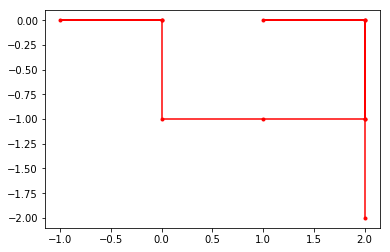

In [6]:
#Taking a look at the plots for a few different step values.

mywalk=random_walk_2d(10)
plot_walk_2d(mywalk)

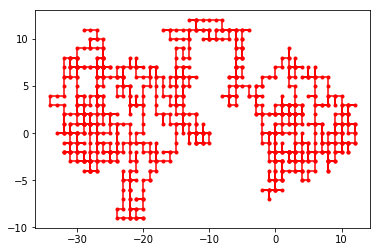

In [7]:
mywalk2=random_walk_2d(1000)
plot_walk_2d(mywalk2)

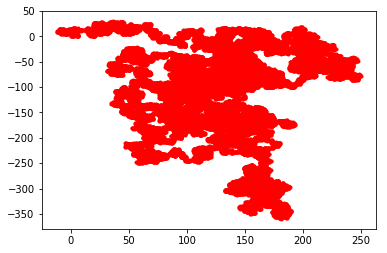

In [8]:
mywalk3=random_walk_2d(100000)
plot_walk_2d(mywalk3)

In [9]:
#This function finds the distance between any number of steps on any number of walks.

def distances(n, m):                #inputs: m=number of walkers, n=number of steps in each walk
    mwalks=np.linspace(1, m, m)     #generic array with same number of elements as number of walks
    distances=[]                    #empty list of distances
    for walk in mwalks:             #loop through every walker
        my_walk=random_walk_2d(n)   #go on an n-step walk
        end_of_walk=my_walk[-1]     #find the position at the end of the walk
        D=np.sqrt(end_of_walk[0]**2 + end_of_walk[1]**2)   #find the distance from the origin with pythagoras
        distances.append(D)         #add to list of distances
    return distances

#This function returns a list of the final displacements of every walker. 

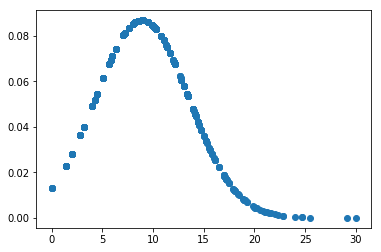

In [10]:
#Now to have a look at the distribution of the distances, of 1000 walkers taking 100 steps.

my_100s_walks=distances(100, 1000)
fit = stats.norm.pdf(my_100s_walks, np.mean(my_100s_walks), np.std(my_100s_walks))
#stats.norm plots a Gaussian distribution 

plt.plot(my_100s_walks,fit,'o')

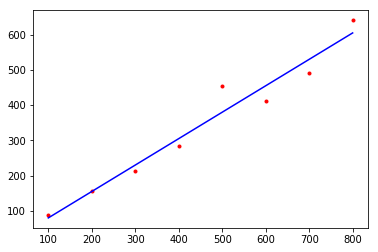

In [11]:
#Now checking if the relationship between the mean displacement and the number of steps taken is consistent with the theory.

my_step_array=np.arange(100, 900, 100)  #choose some values for the number of steps 

mean_distances_squared=[]                                #empty list of the mean final displacement squared
for stepvalue in my_step_array:                          #for each different number of steps as chosen above
    distance_list=distances(stepvalue, 100)              #make a list of the final displacements for 100 walks
    mean_distance_squared=(np.mean(distance_list))**2    #square the mean of the final displacement
    mean_distances_squared.append(mean_distance_squared) #add to list
    
pl1=np.polyfit(my_step_array, mean_distances_squared, 1)       #create a linear fit to the data
plt.plot(my_step_array, mean_distances_squared, 'r.')          #plot steps vs mean distance squared and its fit
plt.plot(my_step_array, np.polyval(pl1, my_step_array), 'b-')

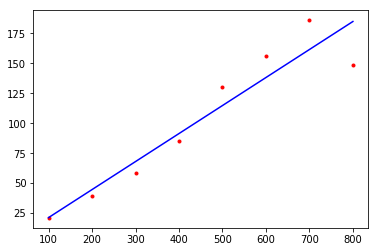

In [12]:
#Finally looking at how the variance scales with steps, using same step array as above. 

variance_list=[]            #empty list of variance values
for n in my_step_array:     #looping through the different numbers of steps
    d=distances(n, 100)     #find the list of distances and the variance
    v=np.var(d)
    variance_list.append(v) #add to list
    

pl2=np.polyfit(my_step_array, variance_list, 1)    #fitting data linearly and plotting 
plt.plot(my_step_array, variance_list, 'r.')
plt.plot(my_step_array, np.polyval(pl2, my_step_array), 'b-')
